## Forecasting on cococola_Sales_data

In [1]:
#import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as smf

In [2]:
#import datasets
cococola= pd.read_excel('CocaCola_Sales_Rawdata.xlsx')
cococola

Quarter        Sales
0    Q1_86  1734.827000
1    Q2_86  2244.960999
2    Q3_86  2533.804993
3    Q4_86  2154.962997
4    Q1_87  1547.818996
5    Q2_87  2104.411995
6    Q3_87  2014.362999
7    Q4_87  1991.746998
8    Q1_88  1869.049999
9    Q2_88  2313.631996
10   Q3_88  2128.320000
11   Q4_88  2026.828999
12   Q1_89  1910.603996
13   Q2_89  2331.164993
14   Q3_89  2206.549995
15   Q4_89  2173.967995
16   Q1_90  2148.278000
17   Q2_90  2739.307999
18   Q3_90  2792.753998
19   Q4_90  2556.009995
20   Q1_91  2480.973999
21   Q2_91  3039.522995
22   Q3_91  3172.115997
23   Q4_91  2879.000999
24   Q1_92  2772.000000
25   Q2_92  3550.000000
26   Q3_92  3508.000000
27   Q4_92  3243.859993
28   Q1_93  3056.000000
29   Q2_93  3899.000000
30   Q3_93  3629.000000
31   Q4_93  3373.000000
32   Q1_94  3352.000000
33   Q2_94  4342.000000
34   Q3_94  4461.000000
35   Q4_94  4017.000000
36   Q1_95  3854.000000
37   Q2_95  4936.000000
38   Q3_95  4895.000000
39   Q4_95  4333.000000
40   Q1_96  4194.000000
41   Q2_96  5253.000000

### EDA

In [3]:
cococola.shape

(42, 2)

In [4]:
cococola.describe()

Sales
count    42.000000
mean   2994.353308
std     977.930896
min    1547.818996
25%    2159.714247
50%    2782.376999
75%    3609.250000
max    5253.000000

In [5]:
cococola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [6]:
quarter = ['Q1', 'Q2', 'Q3', 'Q4']
n = cococola['Quarter'][0]
n[0:2]

'Q1'

In [7]:
cococola['quarter']=0

In [8]:
cococola['Year']=0

In [9]:
for i in range(42):
    n=cococola['Quarter'][i]
    cococola['quarter'][i]=n[0:2]
    cococola['Year'][i] = n[3:5]

C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11676/3837021205.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cococola['quarter'][i]=n[0:2]
C:\Users\Lenovo\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
C:\Users\Lenovo\AppData\Local\Temp/ipykernel_11676/3837021205.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cococola['Ye

In [10]:
dummy = pd.DataFrame(pd.get_dummies(cococola['quarter']))

In [11]:
cococola= pd.concat([cococola,dummy],axis = 1)
cococola.head()

Quarter        Sales quarter  Year  Q1  Q2  Q3  Q4
0   Q1_86  1734.827000      Q1    86   1   0   0   0
1   Q2_86  2244.960999      Q2    86   0   1   0   0
2   Q3_86  2533.804993      Q3    86   0   0   1   0
3   Q4_86  2154.962997      Q4    86   0   0   0   1
4   Q1_87  1547.818996      Q1    87   1   0   0   0

In [12]:
# Lineplot for Sales of CocaCola
plt.figure(figsize=(10,7))
plt.plot(cococola['Sales'], color = 'blue', linewidth=1)

In [13]:
# Histogram
cococola['Sales'].hist(figsize=(8,5))

<AxesSubplot:>

<AxesSubplot:ylabel='Density'>

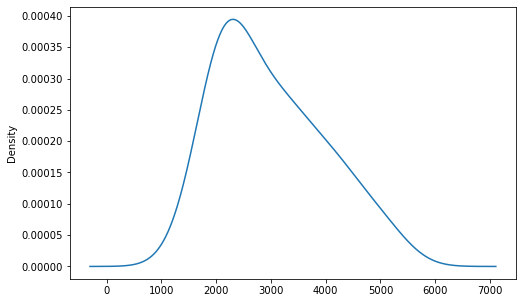

In [14]:
# Density Plot
cococola['Sales'].plot(kind = 'kde', figsize=(8,5))

<AxesSubplot:xlabel='quarter', ylabel='Sales'>

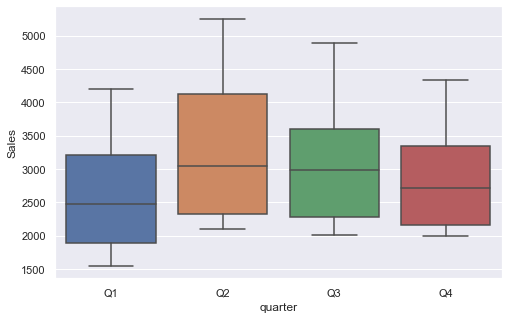

In [15]:
#boxplot of Quarters Vs. Sales
sns.set(rc={'figure.figsize':(8,5)})
sns.boxplot(x="quarter",y="Sales",data=cococola)

<AxesSubplot:xlabel='Year', ylabel='Sales'>

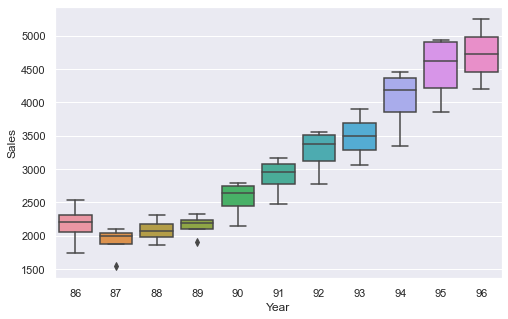

In [16]:
# boxplot of Years Vs. Sales
sns.boxplot(x="Year",y="Sales",data=cococola)

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


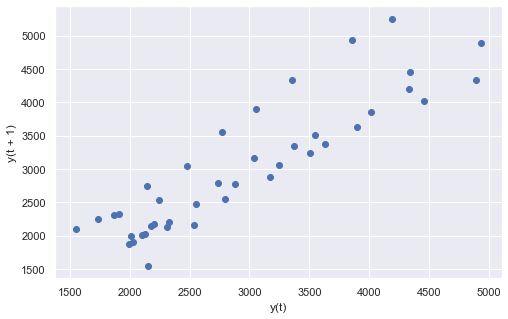

In [17]:
from pandas.plotting import lag_plot
lag_plot(cococola['Sales'])
plt.show()

<AxesSubplot:xlabel='Year', ylabel='Sales'>

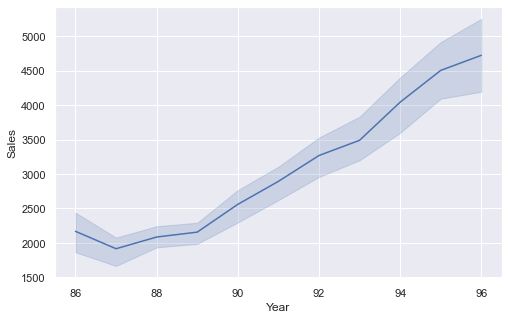

In [18]:
plt.figure(figsize=(8,5))
sns.lineplot(x="Year",y="Sales",data=cococola)

In [19]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cococola.Sales,lags=12)
tsa_plots.plot_pacf(cococola.Sales,lags=12)
plt.show()

In [20]:
plt.figure(figsize=(12,4))
cococola.Sales.plot(label="org")
for i in range(2,8,2):
    cococola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

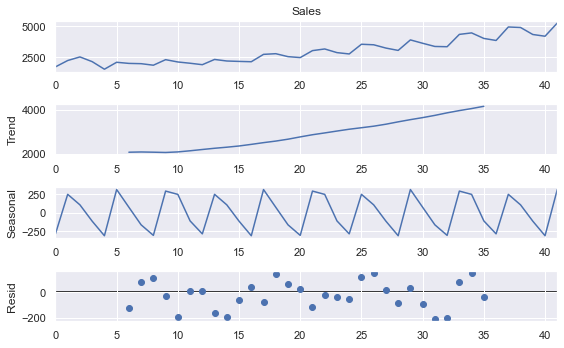

In [21]:
# Time Series Decomposition Plot

from statsmodels.tsa.seasonal import seasonal_decompose

decompose_ts_add = seasonal_decompose(cococola.Sales,period=12)
decompose_ts_add.plot()
plt.show()


In [22]:
t= np.arange(1,43)
cococola['t']=t
cococola['t_square']=cococola['t']*cococola['t']

In [23]:
log_Sales  =np.log(cococola['Sales'])
cococola['log_Sales']=log_Sales

In [24]:
train = cococola.head(32)
test = cococola.tail(8)

### Models

In [25]:
import statsmodels.formula.api as smf

In [26]:
#linear model
linear= smf.ols('Sales~t',data=train).fit()
predlin=pd.Series(linear.predict(pd.DataFrame(test['t'])))
rmselin=np.sqrt((np.mean(np.array(test['Sales'])-np.array(predlin))**2))
rmselin

676.2375118617099

In [27]:
#quadratic model
quad=smf.ols('Sales~t+t_square',data=train).fit()
predquad=pd.Series(quad.predict(pd.DataFrame(test[['t','t_square']])))
rmsequad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predquad))**2))
rmsequad

460.5946908618132

In [28]:
#exponential model
expo=smf.ols('log_Sales~t',data=train).fit()
predexp=pd.Series(expo.predict(pd.DataFrame(test['t'])))
predexp
rmseexpo=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predexp)))**2))
rmseexpo

608.7642428689114

In [29]:
#additive seasonality
additive= smf.ols('Sales~ Q1+Q2+Q3+Q4',data=train).fit()
predadd=pd.Series(additive.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
predadd
rmseadd=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predadd))**2))
rmseadd

1950.8015197295526

In [30]:
#additive seasonality with linear trend
addlinear= smf.ols('Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predaddlinear=pd.Series(addlinear.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
predaddlinear

34    3758.097182
35    3559.905931
36    3424.368502
37    4012.174625
38    3982.538001
39    3784.346750
40    3648.809321
41    4236.615444
dtype: float64

In [31]:
rmseaddlinear=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddlinear))**2))
rmseaddlinear

724.9932444405579

In [32]:
#additive seasonality with quadratic trend
addquad=smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
predaddquad=pd.Series(addquad.predict(pd.DataFrame(test[['t','t_square','Q1','Q2','Q3','Q4']])))
rmseaddquad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(predaddquad))**2))
rmseaddquad

296.2507600891713

In [33]:
#multiplicative seasonality
mulsea=smf.ols('log_Sales~Q1+Q2+Q3+Q4',data=train).fit()
predmul= pd.Series(mulsea.predict(pd.DataFrame(test[['Q1','Q2','Q3','Q4']])))
rmsemul= np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmul)))**2))
rmsemul

2008.7909225744345

In [34]:
#multiplicative seasonality with linear trend
mullin= smf.ols('log_Sales~t+Q1+Q2+Q3+Q4',data=train).fit()
predmullin= pd.Series(mullin.predict(pd.DataFrame(test[['t','Q1','Q2','Q3','Q4']])))
rmsemulin=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(predmullin)))**2))
rmsemulin


480.5305800902801

In [35]:
#multiplicative seasonality with quadratic trend
mul_quad= smf.ols('log_Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_mul_quad= pd.Series(mul_quad.predict(test[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_mul_quad=np.sqrt(np.mean((np.array(test['Sales'])-np.array(np.exp(pred_mul_quad)))**2))
rmse_mul_quad

888.62784846092

In [36]:
#tabulating the rmse values
data={'Model':pd.Series(['rmse_mul_quad','rmseadd','rmseaddlinear','rmseaddquad','rmseexpo','rmselin','rmsemul','rmsemulin','rmsequad']),'Values':pd.Series([rmse_mul_quad,rmseadd,rmseaddlinear,rmseaddquad,rmseexpo,rmselin,rmsemul,rmsemulin,rmsequad])}

In [37]:
data =pd.DataFrame(data)
data

Model       Values
0  rmse_mul_quad   888.627848
1        rmseadd  1950.801520
2  rmseaddlinear   724.993244
3    rmseaddquad   296.250760
4       rmseexpo   608.764243
5        rmselin   676.237512
6        rmsemul  2008.790923
7      rmsemulin   480.530580
8       rmsequad   460.594691

- From the above table Quadratic Additive Seasonality model has less RMSE value
- So we can consider this value for model building

In [38]:
#final model with least rmse value
cococola.head()

Quarter        Sales quarter  Year  Q1  Q2  Q3  Q4  t  t_square  log_Sales
0   Q1_86  1734.827000      Q1    86   1   0   0   0  1         1   7.458663
1   Q2_86  2244.960999      Q2    86   0   1   0   0  2         4   7.716443
2   Q3_86  2533.804993      Q3    86   0   0   1   0  3         9   7.837477
3   Q4_86  2154.962997      Q4    86   0   0   0   1  4        16   7.675529
4   Q1_87  1547.818996      Q1    87   1   0   0   0  5        25   7.344602

In [39]:
final_model = smf.ols('Sales~t+t_square+Q1+Q2+Q3+Q4',data=train).fit()
pred_final = pd.Series(final_model.predict(cococola[['t','t_square','Q1','Q2','Q3','Q4']]))
rmse_final_model =np.sqrt(np.mean((np.array(cococola['Sales'])-np.array(pred_final))**2))
rmse_final_model

185.82859889148588

In [40]:
#Predict values
pred_df = pd.DataFrame({'Actual': cococola.Sales, 'Predicted': pred_final})
pred_df

Actual    Predicted
0   1734.827000  1734.907886
1   2244.960999  2262.621873
2   2533.804993  2172.893111
3   2154.962997  1914.609724
4   1547.818996  1727.564748
5   2104.411995  2272.447917
6   2014.362999  2199.888337
7   1991.746998  1958.774132
8   1869.049999  1788.898338
9   2313.631996  2350.950688
10  2128.320000  2295.560291
11  2026.828999  2071.615267
12  1910.603996  1918.908656
13  2331.164993  2498.130188
14  2206.549995  2459.908973
15  2173.967995  2253.133131
16  2148.278000  2117.595702
17  2739.307999  2713.986416
18  2792.753998  2692.934383
19  2556.009995  2503.327723
20  2480.973999  2384.959476
21  3039.522995  2998.519372
22  3172.115997  2994.636520
23  2879.000999  2822.199043
24  2772.000000  2720.999977
25  3550.000000  3351.729056
26  3508.000000  3365.015386
27  3243.859993  3209.747090
28  3056.000000  3125.717207
29  3899.000000  3773.615467
30  3629.000000  3804.070980
31  3373.000000  3665.971866
32  3352.000000  3599.111165
33  4342.000000  4264.178607
34  4461.000000  4311.803302
35  4017.000000  4190.873370
36  3854.000000  4141.181850
37  4936.000000  4823.418475
38  4895.000000  4888.212351
39  4333.000000  4784.451601
40  4194.000000  4751.929264
41  5253.000000  5451.335070